This CSV dataset contains information pertaining to various Zomato restaurants in Mumbai, like restaurant names, cuisine, ratings, votes, location, etc.

This dataset will help you with answering various questions, like which is the highest rated Seafood Restaurant, or which locality has the best Japanese restaurants, and so on.

## 1. Importing the libraries

In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.io as pio

pio.renderers.default='svg'

## 2. Importing the dataset

In [3]:
#Calling an Existing Function .read_csv (With Parameter as input) from Library - pandas
#Purpose of function - To Read Dataset.CSV
#Assigning into a New Variable - dataset

dataset = pd.read_csv('Zomato Chennai Listing 2020.csv')

#Calling an Existing Variable - dataset for visibility of Dataset Taken 
dataset

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,None,None,None,None,"['Breakfast', 'Delivery Only']"


In [4]:
# Dropping columns which are not required for further analysis

dataset.drop(['Zomato URL','Address'], axis=1, inplace = True)

## 3. Getting Basic Information about the Dataset

In [5]:
# Number of rows and Columns 
print("The Number of Row:",dataset.shape[0])
print("The Number of Column",dataset.shape[1])

The Number of Row: 12032
The Number of Column 10


In [6]:
#Method-01, To check the Presence of Null values in Entire Dataset in Count, since having poor readability in Python
dataset.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [7]:
#Method-02, To check the Presence of NaN values in Entire Dataset in Count, since having poor readability in Python
dataset.isna().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
Name of Restaurant       12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(9)
memory usage: 940.1+ KB


In [9]:
# Converting the Datatype of Column - Price for 2 from float to integer with Two Decimals

dataset['Price for 2'] = dataset['Price for 2'].round(2)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
Name of Restaurant       12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(9)
memory usage: 940.1+ KB


In [10]:
dataset.describe().round(2)

,Price for 2
count,12032.00
mean,397.61
std,332.05
min,40.00
25%,200.00
50%,300.00
75%,450.00
max,5000.00


## 4. Pre-processing the Dataset

### a.Cleaning the Column - Delivery Rating and Column - Delivery Rating Count 

In [11]:
# Checking the rows where both 'Delivery Rating' and 'Delivery Rating Count' are 'None'
column_Delivery_Rating_With_None = (dataset['Delivery Rating']=='None') & (dataset['Delivery Rating Count'].isin(['None', 'Does not offer Delivery', 'Not enough Delivery Reviews']))
print("The Number of Row(s) :",dataset[column_Delivery_Rating_With_None].shape[0])
dataset[column_Delivery_Rating_With_None].head()

The Number of Row(s) : 5851


,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094,None,Does not offer Delivery,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000.0,4.1,354,None,Does not offer Delivery,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500.0,4.2,464,None,Does not offer Delivery,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
85,Bazaar - All Day Diner - Grand by GRT Hotels,Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...","['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...",2500.0,4.4,1198,None,Not enough Delivery Reviews,"['Breakfast', 'Home Delivery', 'Serves Alcohol..."
89,Coal Barbecues,Velachery,"['North Indian', ' Chinese']","['Chicken Honey', ' Fish', ' Prawn', ' Waffles...",1400.0,4.4,9410,None,Does not offer Delivery,"['Indoor Seating', 'Buffet', 'Table reservatio..."


In [12]:
# Updating these rows with Zero
dataset.loc[column_Delivery_Rating_With_None, ['Delivery Rating', 'Delivery Rating Count']] = [0,0]
print("The Number of Row(s) From column_Delivery_Rating_With_None :",dataset[column_Delivery_Rating_With_None].shape[0])
dataset['Delivery Rating'].value_counts().head()

The Number of Row(s) From column_Delivery_Rating_With_None : 5851


0      5851
3.9    1383
3.8     701
4.0     570
3.7     559
Name: Delivery Rating, dtype: int64

### b.Cleaning the Column - Dining Rating and Column - Dining Rating Count 

In [13]:
# Checking the rows where both 'Dining Rating' and 'Dining Rating Count' are 'None'
column_Dining_Rating_With_None = (dataset['Dining Rating']=='None') & (dataset['Dining Rating Count'].isin(['None', 'Does not offer Dining', 'Not enough Dining Reviews']))
print("The Number of Row(s) :",dataset[column_Dining_Rating_With_None].shape[0])
dataset[column_Dining_Rating_With_None].head()

The Number of Row(s) : 5351


,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,None,Does not offer Dining,4.3,1061,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,None,Does not offer Dining,3.9,19600,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,None,Does not offer Dining,4.0,11200,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,None,Does not offer Dining,4.2,11500,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,None,Does not offer Dining,3.9,652,"['Home Delivery', 'Standing Tables']"


In [14]:
## Updating these rows with Zero
dataset.loc[column_Dining_Rating_With_None, ['Dining Rating', 'Dining Rating Count']] = [0,0]
print("The Number of Row(s) From column_Dining_Rating_With_None :", dataset[column_Dining_Rating_With_None].shape[0])
dataset['Dining Rating'].value_counts().head()

The Number of Row(s) From column_Dining_Rating_With_None : 5351


0      5351
3.6     584
3.5     553
3.7     525
3.4     500
Name: Dining Rating, dtype: int64

In [15]:
# Renaming the Column - Price for 2
dataset.rename(columns={'Price for 2': 'Price'}, inplace=True)
dataset.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [16]:
# Renaming the Incorrect Area Names present in the Column - Location into Proper Area Names

# Creating a List With Contained String and a Desired String to be Replaced

old_and_New_area_Names = [
    ('Adyar','Adyar'),('Alandur','Alandur'),('Alwarpet','Alwarpet'),('Ambattur','Ambattur'),('Aminjikarai|Aminijikarai','Aminjikarai'),
    ('Anna Nagar','Anna Nagar'),('Anna Nagar West','Anna Nagar West'),('Arumbakkam','Arumbakkam'),('Ashok Nagar','Ashok Nagar'),
    ('Akkarai','Akkarai'),
    
    ('Besant','Besant Nagar'), 
    
    ('Chengalpattu','Chengalpattu'),('Chetpet','Chetpet'),('Choolaimedu','Choolaimedu'),
    
    ('East Coast Road|East...|\(ECR\)','ECR'),('Egatoor','Egatoor'),('Egmore','Egmore'),('Ekkaduthangal','Ekkaduthangal'),
    
    ('Gopalapuram','Gopalapuram'),('GST','GST Road'),('Guduvancheri','Guduvancheri'),('Guindy','Guindy'),('George Town','George Town'),
    
    ('Injambakkam','Injambakkam'),
    
    ('Kanathur','Kanathur'),('Kovalam','Kovalam'),('Kanchipuram','Kanchipuram District'),('Kandanchavadi','Kandanchavadi'),
    ('Kilpauk','Kilpauk'),('Kodambakkam','Kodambakkam'),('Koyambedu','Koyambedu'),('Kotturpuram','Kotturpuram'),
    ('Kottivakkam','Kottivakkam'),('Kelambakkam','Kelambakkam'),('Karapakkam','Karapakkam'),           
    
    ('Meenambakkam','Meenambakkam'),('Muttukadu','Muttukadu'),('Mogappair','Mogappair'),('MRC Nagar','MRC Nagar'),
    ('Mylapore','Mylapore'),('OMR|Mamallapuram|Old Mahabalipuram Road|\(OMR\)|Mahabalipuram','OMR'),('Madhavaram','Madhavaram'),
    ('Mandaveli','Mandaveli'),('Mambalam','Mambalam'),('Maduravoyal','Maduravoyal'),
    
    ('Nandanam','Nandanam'),('Navallur','Navallur'),('Nungambakkam','Nungambakkam'),('Neelangarai','Neelangarai'),
    
    ('Oragadam','Oragadam'),('Okkiyampet','Okkiyampet'),
    
    ('Palavakkam','Palavakkam'),('Pallavaram','Pallavaram'),('Pallikaranai','Pallikaranai'),('Padur','Padur'),
    ('Perambur','Perambur'),('Perumbakkam','Perumbakkam'),('Porur','Porur'),('Purasavakkam','Purasavakkam'),
    ('Park Town','Park Town'),
    
    ('Ramapuram','Ramapuram'),('RA Puram','RA Puram'),('Ramapuram','Ramapuram'),('Redhills|Red Hills','Redhills'),
    ('RK Salai \(Cathedral Road\)','RK Salai \(Cathedral Road\)'),('Royapettah','Royapettah'),
    
    ('Saidapet','Saidapet'),('Sholinganallur','Sholinganallur'),('Sriperumbudur','Sriperumbudur'),('Santhome','Santhome'),
    ('Shenoy','Shenoy Nagar'),('Semmancheri','Semmancheri'),('Sowcarpet','Sowcarpet'),('Saligramam','Saligramam'),
    
    ('Thomas Mount','St. Thomas Mount'),('T. Nagar|T.Nagar','T.Nagar'),('Taramani','Taramani'),('Teynampet','Teynampet'),
    ('Thiruvallur','Thiruvallur'),('Thiruvanmiyur','Thiruvanmiyur'),('Thousand Lights','Thousand Lights'),
    ('Thuraipakkam','Thuraipakkam'),('Triplicane','Triplicane'),('Tiruvottiyur','Tiruvottiyur'),
    
    ('Vadapalani','Vadapalani'),('Vandalur','Vandalur'),('Velachery','Velachery'),('Vepery','Vepery'),
    ('Virugambakkam','Virugambakkam'),('Vettuvankeni','Vettuvankeni'),
    
    ('The Slate|Sriperumbudur|Somerset Greenways|Grande Bay Resort|Citadines|V7 Hotel|Feathers, A Radha Hotel|Grand by GRT Hotels|Foodies Kitchen|Turyaa Chennai','Unknown Area')

]

# Looping through and replacing the Contained String with Desired String
for existing_Area, new_area in old_and_New_area_Names:
    dataset.loc[dataset['Location'].str.contains(existing_Area, case=False, na=False),'Location'] = new_area
    
dataset['Location'].value_counts(ascending = True).head(60)

Novotel Chennai Sipcot           3
Oragadam                         4
Meenambakkam                     9
Vettuvankeni                    10
Muttukadu                       11
Kovalam                         12
MRC Nagar                       12
RK Salai \(Cathedral Road\)     13
Guduvancheri                    15
Akkarai                         16
Okkiyampet                      17
Kandanchavadi                   17
Santhome                        25
Unknown Area                    25
Kotturpuram                     26
Kanathur                        29
Shenoy Nagar                    31
ECR                             31
St. Thomas Mount                32
Anna Salai                      36
Alandur                         37
Semmancheri                     38
Neelangarai                     38
Nandanam                        39
Parrys                          40
Mandaveli                       41
Park Town                       41
Chetpet                         43
RA Puram            

In [17]:
# Finding all the duplicate rows

duplicate_records = dataset[dataset.duplicated()].sort_values(by = 'Name of Restaurant', ascending = False)
print("The Number of Row:",duplicate_records.shape[0])
duplicate_records.head()

The Number of Row: 46


,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
9995,ibaco,Kanchipuram District,['Ice Cream'],Invalid,200.0,0,0,0,0,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
11733,Wangs Express,Mogappair,"['Chinese', ' Beverages']",Invalid,600.0,0,0,0,0,['Delivery Only']
11732,Wangs Express,Nandanam,"['Chinese', ' Beverages']",Invalid,600.0,0,0,0,0,['Delivery Only']
11390,The Cake Point,Mogappair,['Bakery'],Invalid,200.0,0,0,0,0,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
11995,Sardarji Kulfi,Anna Nagar,['Ice Cream'],Invalid,150.0,0,0,0,0,['Delivery Only']


In [18]:
# Dropping all the duplicate rows

dataset = dataset.drop_duplicates()

In [19]:
# Removing the Square Brackets and Apostrophes from Column - Cuisine,Top Dishes and Features

dataset['Cuisine'] = dataset['Cuisine'].str.replace(r"[\[\]']", '', regex = True)
dataset['Top Dishes'] = dataset['Top Dishes'].str.replace(r"[\[\]']", '', regex = True)
dataset['Features'] = dataset['Features'].str.replace(r"[\[\]']", '', regex = True)
dataset.head()

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


In [20]:
# Changing Data Type of the numerical columns

dataset['Price'] = dataset['Price'].astype('int64')
dataset['Dining Rating'] = dataset['Dining Rating'].astype('float64')
dataset['Dining Rating Count'] = dataset['Dining Rating Count'].astype('float64')
dataset['Delivery Rating'] = dataset['Delivery Rating'].astype('float64')
dataset['Delivery Rating Count'] = dataset['Delivery Rating Count'].astype('float64')

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11986 entries, 0 to 12031
Data columns (total 10 columns):
Name of Restaurant       11986 non-null object
Location                 11986 non-null object
Cuisine                  11986 non-null object
Top Dishes               11986 non-null object
Price                    11986 non-null int64
Dining Rating            11986 non-null float64
Dining Rating Count      11986 non-null float64
Delivery Rating          11986 non-null float64
Delivery Rating Count    11986 non-null float64
Features                 11986 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.0+ MB


In [22]:
# Creating a Function - classify_rating(With Parameter)

def classify_rating(column_rating):
    rating = float(column_rating)
    if rating >= 4.5 :
        return 'Excellent'
    if rating >= 4.0 :
        return 'Very Good'
    if rating >= 3.5 :
        return 'Good'
    if rating >= 3.0 :
        return 'Average'
    if rating > 0 :
        return 'Poor'

In [23]:
# Adding Two More New Column(s) based on rating

dataset['Dining Rating Type'] = dataset['Dining Rating'].apply(classify_rating)
dataset['Delivery Rating Type'] = dataset['Delivery Rating'].apply(classify_rating)
dataset.head()

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\AI_ML\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Dining Rating Type,Delivery Rating Type
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500,4.3,1500.0,4.3,9306.0,"Home Delivery, Indoor Seating",Very Good,Very Good
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000,4.4,3059.0,4.1,39200.0,"Home Delivery, Free Parking, Table booking rec...",Very Good,Very Good
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500,4.3,1361.0,4.4,10500.0,"Home Delivery, Indoor Seating",Very Good,Very Good
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500,4.0,1101.0,4.0,11200.0,"Home Delivery, Free Parking, Card Upon Deliver...",Very Good,Very Good
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450,4.2,617.0,4.1,22400.0,"Home Delivery, Indoor Seating",Very Good,Very Good


In [24]:
# Reordering the Column - Dining Rating Type Next to Column - Dining Rating 
# Reordering the Column - Delivery Rating Type Next to Column - Delivery Rating

dataset_columns = list(dataset.columns)
dining_rating_index = dataset_columns.index('Dining Rating')
delivery_rating_index = dataset_columns.index('Delivery Rating')

dataset_columns.insert(dining_rating_index + 1, dataset_columns.pop(dataset_columns.index('Dining Rating Type')))
dataset_columns.insert(dining_rating_index + 4, dataset_columns.pop(dataset_columns.index('Delivery Rating Type')))

dataset = dataset[dataset_columns]
dataset.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Type,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500,4.3,Very Good,1500.0,4.3,Very Good,9306.0,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000,4.4,Very Good,3059.0,4.1,Very Good,39200.0,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500,4.3,Very Good,1361.0,4.4,Very Good,10500.0,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500,4.0,Very Good,1101.0,4.0,Very Good,11200.0,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450,4.2,Very Good,617.0,4.1,Very Good,22400.0,"Home Delivery, Indoor Seating"


## 5. Copying the Pre-processed Data into a New DataFrame - dataset_zomato_chennai

In [25]:
dataset_zomato_chennai = dataset.copy()
dataset_zomato_chennai.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Type,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500,4.3,Very Good,1500.0,4.3,Very Good,9306.0,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000,4.4,Very Good,3059.0,4.1,Very Good,39200.0,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500,4.3,Very Good,1361.0,4.4,Very Good,10500.0,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500,4.0,Very Good,1101.0,4.0,Very Good,11200.0,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450,4.2,Very Good,617.0,4.1,Very Good,22400.0,"Home Delivery, Indoor Seating"


## 5. Performing Exploratory Data Analysis

### Q1) How many restaurants are in Chennai for each Area ?

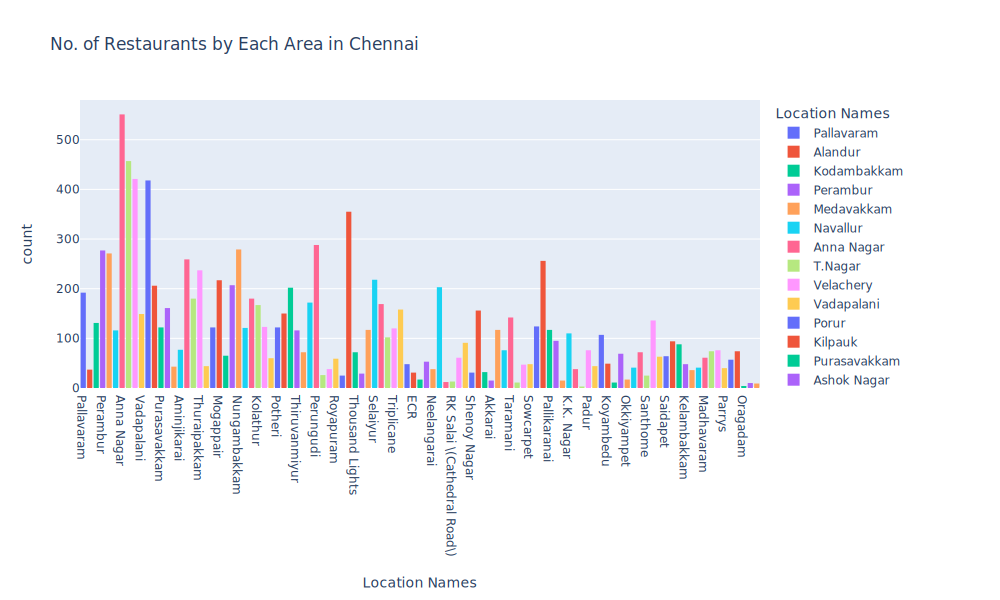

In [26]:
# Plotting the Cleaned Data into Graph - Histogram by Calling a Function .histogram() from Library - Plotly.express 

fig = px.histogram(dataset_zomato_chennai, x  = 'Location', color = 'Location',
                  title = 'No. of Restaurants by Each Area in Chennai ', labels = {'Location' : 'Location Names'},
                   width=1000, # Width of the figure in pixels
                   height=600  # Height of the figure in pixels
                  )
fig.show()

### Q2) What are the Percentage of Restaurants by Dining Rating in Chennai ?

In [27]:
rating_type_dining = dataset_zomato_chennai['Dining Rating Type'].value_counts()
rating_type_dining

Good         2501
Average      2061
Poor         1226
Very Good     817
Excellent      76
Name: Dining Rating Type, dtype: int64

In [28]:
# Funtion .value_counts().reset_index() gives RATING_TYPE Value in Column - Dining Rating Type and its Count in Column - Dining Rating Type

rating_type_dining = dataset_zomato_chennai['Dining Rating Type'].value_counts().reset_index()
rating_type_dining

,index,Dining Rating Type
0,Good,2501
1,Average,2061
2,Poor,1226
3,Very Good,817
4,Excellent,76


In [29]:
# Renaming the Columns of Dataframe - rating_type_dining which is created above

rating_type_dining.rename(columns = {'index': 'Dining_Rating_Type', 'Dining Rating Type' : 'Count_Dining_Rating_Type'}, 
                          inplace = True)
rating_type_dining

,Dining_Rating_Type,Count_Dining_Rating_Type
0,Good,2501
1,Average,2061
2,Poor,1226
3,Very Good,817
4,Excellent,76


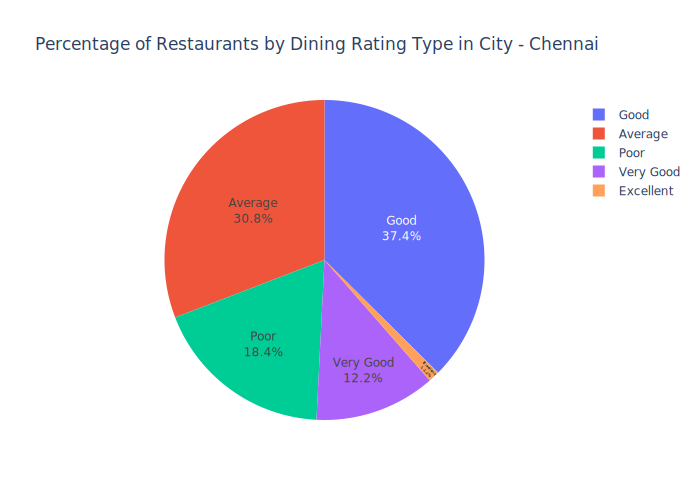

In [30]:
# Plotting the Cleaned Data into Graph - Pie Diagram by Calling a Function .pie() from Library - Plotly.express 

fig = px.pie(rating_type_dining, names = 'Dining_Rating_Type', values = 'Count_Dining_Rating_Type', 
             color = 'Dining_Rating_Type',title = 'Percentage of Restaurants by Dining Rating Type in City - Chennai').update_traces(textposition = 'inside',
                                                                                                       textinfo = 'label+percent')
fig.show()

## Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai ?

In [31]:
# Filtering out the Column - Top Dishes Only which contains - Seafood
dataset_sea_food = dataset_zomato_chennai[dataset_zomato_chennai['Top Dishes'].str.contains('Seafood')]
dataset_sea_food.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Type,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
217,Kobe Sizzlers,Velachery,"Continental, Italian, Chinese, Steak","Seafood Sizzler, Mojito, Lamb Chops, Mockta...",1100,4.4,Very Good,2261.0,3.7,Good,64.0,"Home Delivery, Mall Parking, Indoor Seating, T..."


In [32]:
# Sorting out the Dataset - dataset_sea_food by Column - 'Dining Rating' in Descending Order
dataset_sea_food.sort_values(by = 'Dining Rating', ascending = False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Type,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
217,Kobe Sizzlers,Velachery,"Continental, Italian, Chinese, Steak","Seafood Sizzler, Mojito, Lamb Chops, Mockta...",1100,4.4,Very Good,2261.0,3.7,Good,64.0,"Home Delivery, Mall Parking, Indoor Seating, T..."


## Q4) Which is the best Food Truck in Chennai ?
Skipping this Requirement Since there is No Cuisine Type Column in Dataset - Chennai 

## Q5) Which places have the highest rated restaurant in Chennai ?

In [33]:
# Filtering out the Column - RATING Only which is Equal To Or More than 4.5 of Ratings
dataset_highest_rated_restaurants = dataset_zomato_chennai[dataset_zomato_chennai['Dining Rating'] >= 4.5]
dataset_highest_rated_restaurants

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Type,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
15,Welcome Hotel,Purasavakkam,"South Indian, Desserts, Beverages","Pongal, Podi Dosa, Idli Sambar, Vada Curry,...",300,4.5,Excellent,1094.0,0.0,None,0.0,"Breakfast, Vegetarian Only, Indoor Seating"
24,Eating Circles,Alwarpet,South Indian,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250,4.7,Excellent,782.0,4.2,Very Good,2744.0,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
37,Shree Mithai,Chetpet,"Mithai, Street Food, Fast Food","Chaat, Badam Milk, Pav Bhaji, Panipuri, Ra...",300,4.6,Excellent,1085.0,4.4,Very Good,18600.0,"Breakfast, Home Delivery, Vegetarian Only, Fre..."
50,Andhikkadai,Velachery,South Indian,"Coffee, Sweet Kozhukattai, Idli, Pongal, K...",200,4.6,Excellent,908.0,4.2,Very Good,17300.0,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
57,Brownie Heaven,Royapettah,"Bakery, Desserts, Beverages","Vanilla Ice Cream, Brownie Shake, Filtered C...",350,4.9,Excellent,842.0,4.3,Very Good,2270.0,"Home Delivery, Indoor Seating, Desserts and Bakes"
...,...,...,...,...,...,...,...,...,...,...,...,...
9279,Gastronomer By Double Roti,Teynampet,"Cafe, American, Fast Food","Burgers, Fries, Oreo Shake, Healthy Wealthy...",900,4.5,Excellent,2341.0,4.2,Very Good,2577.0,"Home Delivery, Indoor Seating, Wifi"
9358,Writer's Cafe,Taramani,"Cafe, American","Hot Chocolate, Pizza, Pasta, Waffles, Spag...",600,4.5,Excellent,497.0,4.1,Very Good,360.0,"Home Delivery, Indoor Seating, Table booking r..."
9363,Flower Drum,Adyar,"Chinese, Thai","Momos, Noodle, Dimsum Platter, Schezwan Fri...",800,4.5,Excellent,617.0,4.3,Very Good,819.0,"Home Delivery, Wheelchair Accessible, Vegetari..."
9367,Cream Stone,Thuraipakkam,"Desserts, Ice Cream","Death By Chocolate, Chocolava, Tiramisu, Ch...",350,4.5,Excellent,683.0,4.2,Very Good,4553.0,"Home Delivery, Vegetarian Only, Indoor Seating..."


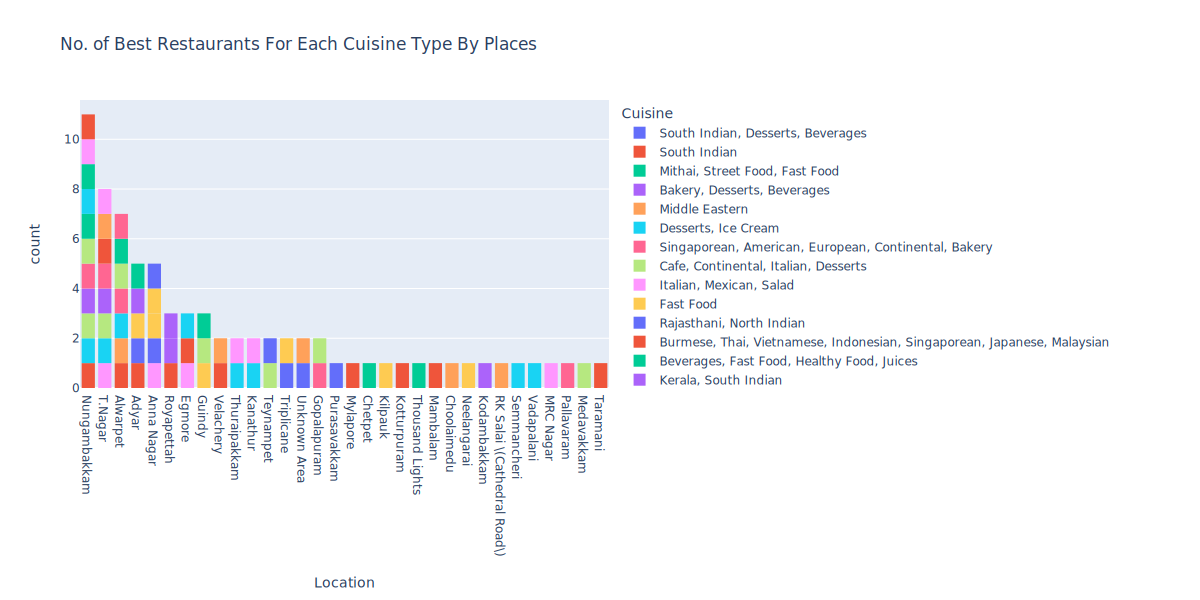

In [34]:
# Plotting the Cleaned Data into Graph - Histogram by Calling a Function .histogram() from Library - Plotly.express 

fig = px.histogram(dataset_highest_rated_restaurants, x = 'Location', color = 'Cuisine', 
             title = 'No. of Best Restaurants For Each Cuisine Type By Places',
            width=1200, # Width of the figure in pixels
            height=600  # Height of the figure in pixels
            ).update_xaxes(categoryorder = 'total descending')
fig.show()

## Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine in Chennai ?

In [35]:
# Adding One More Column - ['PRICE'].mean() to Dataframe - dataset_highest_rated_by_cuisine_type
dataset_highest_rated_by_cuisine_type = dataset_highest_rated_restaurants.groupby(by = ['Location','Cuisine'])['Price'].mean()
dataset_highest_rated_by_cuisine_type.head()

Location  Cuisine                                                  
Adyar     Chinese,  Thai                                                800
          Ice Cream                                                     200
          North Indian,  Chettinad,  Mughlai,  Desserts,  Beverages    1800
          South Indian                                                  500
          South Indian,  Kerala,  Andhra                               2500
Name: Price, dtype: int64

In [36]:
# summarized DataFrame with one row per group.
dataset_highest_rated_by_cuisine_type = dataset_highest_rated_restaurants.groupby(by = ['Location','Cuisine'])['Price'].mean().reset_index()
dataset_highest_rated_by_cuisine_type.head()

,Location,Cuisine,Price
0,Adyar,"Chinese, Thai",800
1,Adyar,Ice Cream,200
2,Adyar,"North Indian, Chettinad, Mughlai, Desserts,...",1800
3,Adyar,South Indian,500
4,Adyar,"South Indian, Kerala, Andhra",2500


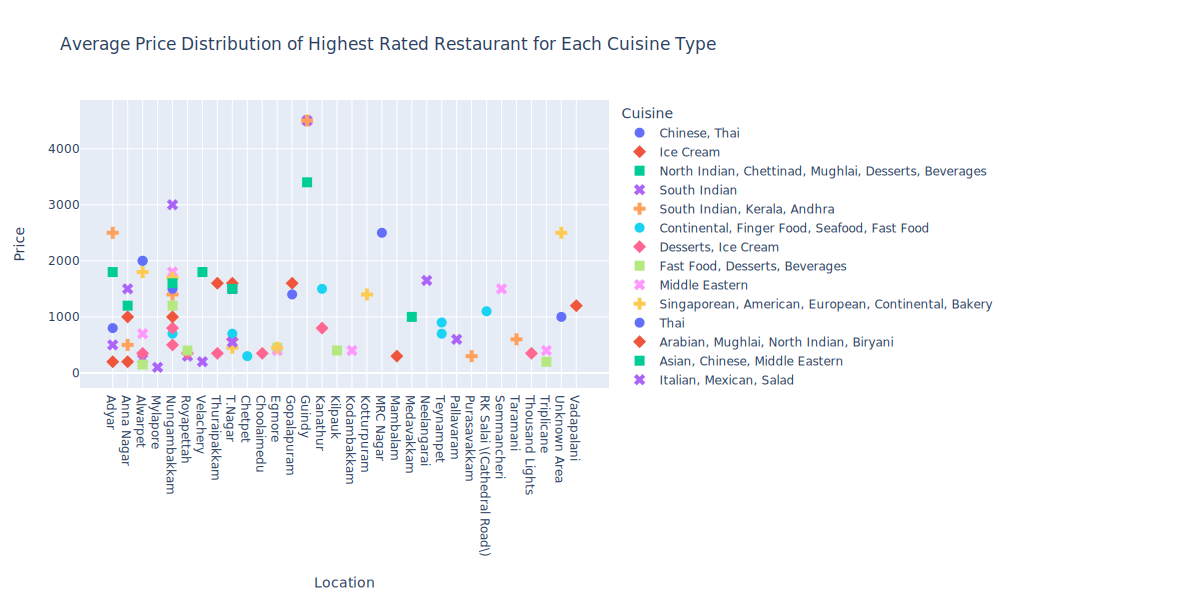

In [37]:
# Plotting the Cleaned Data into Graph - scatter by Calling a Function .scatter() from Library - Plotly.express 

fig = px.scatter(
    dataset_highest_rated_by_cuisine_type,
    x='Location',
    y='Price',
    symbol='Cuisine',
    color='Cuisine',
    title='Average Price Distribution of Highest Rated Restaurant for Each Cuisine Type',
    width=1200,      # Width of the figure in pixels
    height=600       # Height of the figure in pixels
).update_traces(marker_size=10)

fig.show()

## Q7) Which areas have a large number of Chinese Restaurant Market?

In [38]:
# Filtering out the Column - CUSINE_CATEGORY Only which contains - Chinese
dataset_Chinese_Restaurants = dataset_zomato_chennai[dataset_zomato_chennai['Cuisine'].str.contains('Chinese')]
dataset_Chinese_Restaurants

,Name of Restaurant,Location,Cuisine,Top Dishes,Price,Dining Rating,Dining Rating Type,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500,4.3,Very Good,1361.0,4.4,Very Good,10500.0,"Home Delivery, Indoor Seating"
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450,4.2,Very Good,617.0,4.1,Very Good,22400.0,"Home Delivery, Indoor Seating"
5,Dine N Fun,Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450,4.1,Very Good,567.0,3.8,Good,24700.0,"Home Delivery, Indoor Seating"
8,Savoury Sea Shell,Anna Nagar,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400,4.2,Very Good,2564.0,4.1,Very Good,21700.0,"Home Delivery, Indoor Seating, Card Upon Deliv..."
9,Sangeetha Veg Restaurant,T.Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800,4.4,Very Good,1578.0,4.2,Very Good,39600.0,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12014,Bowl Bazaar,Adyar,"North Indian, South Indian, Chinese, Biryani",Invalid,500,0.0,None,0.0,0.0,None,0.0,Delivery Only
12015,Bowl Bazaar,Medavakkam,"North Indian, South Indian, Chinese, Biryani",Invalid,500,0.0,None,0.0,0.0,None,0.0,Delivery Only
12016,Bowl Bazaar,Perungudi,"North Indian, South Indian, Chinese",Invalid,400,0.0,None,0.0,0.0,None,0.0,Delivery Only
12017,Bowl Bazaar,Medavakkam,"North Indian, South Indian, Chinese",Invalid,400,0.0,None,0.0,0.0,None,0.0,Delivery Only


In [39]:
# Step 1: Calculate count and average price per region
#Prepares to perform aggregations (summary calculations) for each group.

RestaurantCount_and_AveragePrice_By_Location = dataset_Chinese_Restaurants.groupby('Location').agg( 
    COUNT_OF_RESTAURANTS = ('Name of Restaurant', 'count'), AVERAGE_PRICE = ('Price', 'mean')
).reset_index()

RestaurantCount_and_AveragePrice_By_Location.head()

,Location,COUNT_OF_RESTAURANTS,AVERAGE_PRICE
0,Adambakkam,24,354.166667
1,Adyar,49,702.040816
2,Akkarai,7,942.857143
3,Alandur,13,480.769231
4,Alwarpet,13,619.230769


In [40]:
chinese_RestaurantCount_and_AveragePrice_By_Location = RestaurantCount_and_AveragePrice_By_Location.sort_values('COUNT_OF_RESTAURANTS', ascending = False).head(25)
chinese_RestaurantCount_and_AveragePrice_By_Location.head()

,Location,COUNT_OF_RESTAURANTS,AVERAGE_PRICE
7,Anna Nagar,155,510.967742
68,Porur,132,415.530303
5,Ambattur,120,380.000000
86,T.Nagar,115,549.565217
100,Velachery,106,508.490566


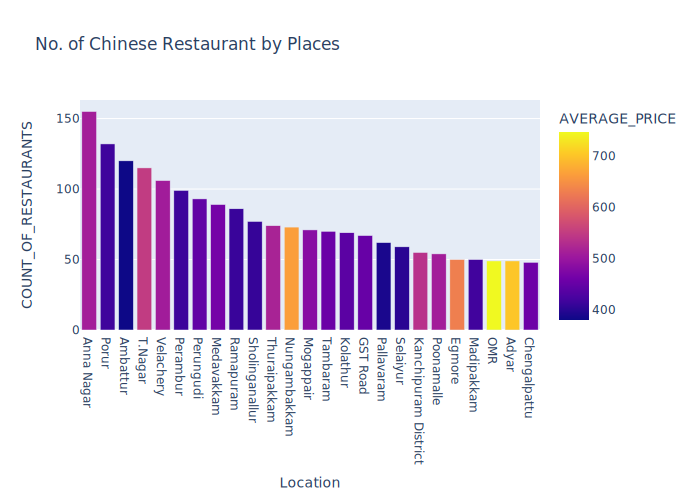

In [41]:
# Plotting the Cleaned Data into Graph - bar by Calling a Function .bar() from Library - Plotly.express 

fig = px.bar(chinese_RestaurantCount_and_AveragePrice_By_Location, x='Location', y='COUNT_OF_RESTAURANTS', color='AVERAGE_PRICE', 
             title= 'No. of Chinese Restaurant by Places')
fig.show()

### Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [42]:
AveragePrice_and_ActualRating_By_CuisineType = dataset_zomato_chennai.groupby(['Cuisine','Dining Rating'])['Price'].mean().reset_index()
AveragePrice_and_ActualRating_By_CuisineType

,Cuisine,Dining Rating,Price
0,American,0.0,500.0
1,"American, Andhra, Asian, Beverages, Chetti...",2.4,800.0
2,"American, Arabian, Italian, Mexican, Bever...",0.0,150.0
3,"American, BBQ",0.0,400.0
4,"American, Continental",0.0,400.0
...,...,...,...
5049,"Tibetan, Momos",3.8,400.0
5050,"Tibetan, Momos",4.0,400.0
5051,"Turkish, Kebab",4.3,500.0
5052,Wraps,0.0,150.0


In [43]:
# Plotting the Cleaned Data into Graph - line by Calling a Function .line() from Library - Plotly.express 

fig = px.line(AveragePrice_and_ActualRating_By_CuisineType, x = 'Dining Rating', y = 'Price', color = 'Cuisine',
             width=1200, height=400 )
fig.show()

## Q9) Is there a relation between Region and Price ?

In [44]:
AveragePrice_and_Location = dataset_zomato_chennai.groupby(['Location'])['Price'].mean().reset_index()
AveragePrice_and_Location

,Location,Price
0,Adambakkam,291.025641
1,Adyar,507.777778
2,Akkarai,703.333333
3,Alandur,414.864865
4,Alwarpet,569.672131
...,...,...
100,Velachery,400.095012
101,Vepery,280.952381
102,Vettuvankeni,540.000000
103,Virugambakkam,355.263158


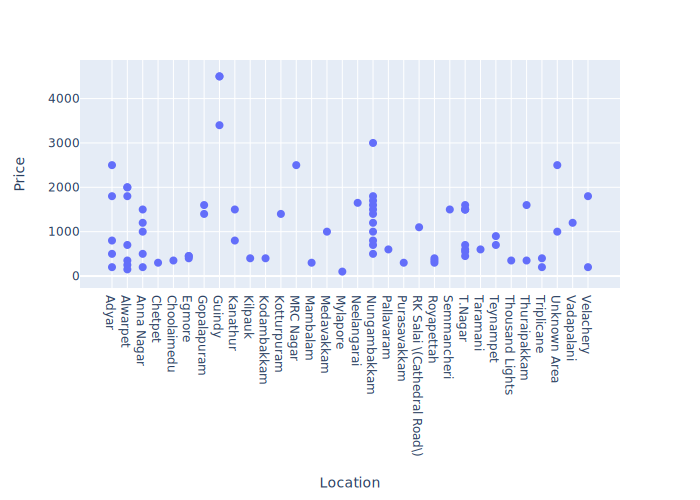

In [45]:
# Plotting the Cleaned Data into Graph - scatter by Calling a Function .scatter() from Library - Plotly.express 

fig = px.scatter(dataset_highest_rated_by_cuisine_type, x = 'Location', y = 'Price').update_traces(marker_size = 8)
fig.show()

## Q10) Find the list of Affordable Restaurants?

## Method - 01

In [46]:
max_price = dataset_zomato_chennai['Price'].max()
max_price

5000

In [47]:
one_fourth_price = max_price/4
one_fourth_price

1250.0

In [48]:
# Filtering out required Columns from Dataset - dataset_zomato
affordable_restaurant = dataset_zomato_chennai[['Name of Restaurant', 'Location', 'Top Dishes', 'Price', 'Dining Rating','Dining Rating Type']]

# Finding list of restaurants that have price less than Or equal to 1/4th of the max price
affordable_restaurant = affordable_restaurant[affordable_restaurant['Price'] <= 1250]
affordable_restaurant = affordable_restaurant.sort_values(by = 'Price')
affordable_restaurant

,Name of Restaurant,Location,Top Dishes,Price,Dining Rating,Dining Rating Type
4685,Soda Hub,OMR,Invalid,40,3.2,Average
6854,Planet Soda,Kandanchavadi,Invalid,50,0.0,None
8355,Kaafemaa,Ambattur,Invalid,50,0.0,None
7405,Indian Coffee House,Vepery,Invalid,50,0.0,None
1448,Mamee Soup,Mambalam,"Herbal Soup, French Onion Soup",60,4.1,Very Good
...,...,...,...,...,...,...
1105,"Vapor - Feathers, A Radha Hotel",Unknown Area,"Cocktails, Mocktails",1200,3.8,Good
1166,The Roof Top Lounge,Guindy,"Lemon Cheesecake, Arabian Platter, Jumbo Pra...",1200,4.0,Very Good
1171,Kapi Multicuisine Restaurant,ECR,Invalid,1200,2.6,Poor
473,Dynasty,Nungambakkam,"Momos, Golden Fried Prawns, Fried Rice Chick...",1200,4.2,Very Good


#### Now, we'll merge the affordable_restaurant with highest_rated_restaurant to obtain the intersection i.e the list of Affordable Restaurants !!

In [49]:
# No. of Rows in Dataframe - affordable_restaurant : 11694 (With 6 Columns)
# No. of Rows in Dataframe - dataset_highest_rated_restaurants : 76 (With 12 Columns)
# No. of Rows in Dataframe - affordable_and_highest_rated : 65 (With 9 Columns)

# an inner join only keeps rows where both DataFrames have matching values for both NAME and REGION.
affordable_and_highest_rated = pd.merge(affordable_restaurant, dataset_highest_rated_restaurants, how='inner', on=['Name of Restaurant','Location'])

# Affordable Restaurants with low price and high rating
affordable_and_highest_rated

,Name of Restaurant,Location,Top Dishes_x,Price_x,Dining Rating_x,Dining Rating Type_x,Cuisine,Top Dishes_y,Price_y,Dining Rating_y,Dining Rating Type_y,Dining Rating Count,Delivery Rating,Delivery Rating Type,Delivery Rating Count,Features
0,Rayar's Mess,Mylapore,"Pongal, Vada, Filtered Coffee, Idli, Bonda...",100,4.7,Excellent,South Indian,"Pongal, Vada, Filtered Coffee, Idli, Bonda...",100,4.7,Excellent,904.0,4.3,Very Good,1319.0,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
1,Royal Sandwich Shop,Alwarpet,Invalid,150,3.6,Good,"Fast Food, Desserts, Beverages","Brownie, Cheese Masala Toast, Chocolate Sand...",150,4.7,Excellent,1304.0,3.9,Good,11200.0,"Home Delivery, Indoor Seating"
2,Royal Sandwich Shop,Alwarpet,Invalid,150,3.0,Average,"Fast Food, Desserts, Beverages","Brownie, Cheese Masala Toast, Chocolate Sand...",150,4.7,Excellent,1304.0,3.9,Good,11200.0,"Home Delivery, Indoor Seating"
3,Royal Sandwich Shop,Alwarpet,"Brownie, Cheese Masala Toast, Chocolate Sand...",150,4.7,Excellent,"Fast Food, Desserts, Beverages","Brownie, Cheese Masala Toast, Chocolate Sand...",150,4.7,Excellent,1304.0,3.9,Good,11200.0,"Home Delivery, Indoor Seating"
4,Bombay Kulfi,Anna Nagar,"Calcutta Paan, Tender Coconut Kulfi, Paan Ic...",200,4.6,Excellent,Ice Cream,"Calcutta Paan, Tender Coconut Kulfi, Paan Ic...",200,4.6,Excellent,397.0,4.4,Very Good,3468.0,"Home Delivery, Sugar Free Options, Free Parkin..."
5,Bombay Kulfi,Adyar,"Kesar Pista Kulfi, Malai Kulfi, Chocolate Ku...",200,4.9,Excellent,Ice Cream,"Kesar Pista Kulfi, Malai Kulfi, Chocolate Ku...",200,4.9,Excellent,534.0,4.3,Very Good,1476.0,"Home Delivery, Free Parking, Outdoor Seating, ..."
6,Andhikkadai,Velachery,"Coffee, Sweet Kozhukattai, Idli, Pongal, K...",200,4.6,Excellent,South Indian,"Coffee, Sweet Kozhukattai, Idli, Pongal, K...",200,4.6,Excellent,908.0,4.2,Very Good,17300.0,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
7,Nair Mess,Triplicane,"Fish Fry, Omelette, Vanjaram Fry, Masala Pr...",200,4.5,Excellent,"South Indian, Biryani","Fish Fry, Omelette, Vanjaram Fry, Masala Pr...",200,4.5,Excellent,1038.0,0.0,None,0.0,Indoor Seating
8,Eating Circles,Alwarpet,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250,4.7,Excellent,South Indian,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250,4.7,Excellent,782.0,4.2,Very Good,2744.0,"Breakfast, Home Delivery, Vegetarian Only, Ind..."
9,The Sandwich Shop,Mambalam,"Mocktails, Fries, Pizza Sandwich, Tandoori ...",300,4.9,Excellent,"Sandwich, Fast Food, Beverages","Mocktails, Fries, Pizza Sandwich, Tandoori ...",300,4.9,Excellent,584.0,4.4,Very Good,895.0,"Home Delivery, Vegetarian Only, Bulk Orders Ac..."


## Method - 02

In [50]:
# No. of Rows in Dataframe - best_restaurant : 65 (With 6 Columns)

best_restaurant = dataset_zomato_chennai[['Name of Restaurant', 'Location', 'Top Dishes', 'Price', 'Dining Rating','Dining Rating Type']]
best_restaurant = best_restaurant[(best_restaurant['Price'] <= 1250) & (best_restaurant['Dining Rating'] >= 4.5)].sort_values(by = 'Price')

# Affordable Restaurants with low price and high rating
best_restaurant

,Name of Restaurant,Location,Top Dishes,Price,Dining Rating,Dining Rating Type
108,Rayar's Mess,Mylapore,"Pongal, Vada, Filtered Coffee, Idli, Bonda...",100,4.7,Excellent
178,Royal Sandwich Shop,Alwarpet,"Brownie, Cheese Masala Toast, Chocolate Sand...",150,4.7,Excellent
9541,Bombay Kulfi,Anna Nagar,"Calcutta Paan, Tender Coconut Kulfi, Paan Ic...",200,4.6,Excellent
320,Bombay Kulfi,Adyar,"Kesar Pista Kulfi, Malai Kulfi, Chocolate Ku...",200,4.9,Excellent
50,Andhikkadai,Velachery,"Coffee, Sweet Kozhukattai, Idli, Pongal, K...",200,4.6,Excellent
154,Nair Mess,Triplicane,"Fish Fry, Omelette, Vanjaram Fry, Masala Pr...",200,4.5,Excellent
24,Eating Circles,Alwarpet,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250,4.7,Excellent
270,ID,Royapettah,"Filtered Coffee, Appam, Buttermilk, Sweet P...",300,4.5,Excellent
155,The Sandwich Shop,Mambalam,"Mocktails, Fries, Pizza Sandwich, Tandoori ...",300,4.9,Excellent
15,Welcome Hotel,Purasavakkam,"Pongal, Podi Dosa, Idli Sambar, Vada Curry,...",300,4.5,Excellent


## Q10) Find the list of most Reliable Restaurants?

<div class = "alert alert-block alert-danger", align="center">
<h2>Note : Here, I have followed Method - 02 as Shown in above Scenario</h2>
</div>

In [51]:
average_votes = dataset_zomato_chennai['Dining Rating Count'].mean()
average_votes

75.45010845986985

In [52]:
# Finding list of restaurants that have Votes Greater than Or Equal to Average of Vote

required_columns = dataset_zomato_chennai[['Name of Restaurant', 'Location','Price', 'Dining Rating','Dining Rating Type','Dining Rating Count']]

# The Most Reliable Restaurants (More than 75.45 Votes) sorted by Price (Equal To Or less than Rs.1,250) With High Ratings (Equal To Or More than 4.5) 
reliable_restaurant = required_columns[(required_columns['Price'] <= 1250) & (required_columns['Dining Rating'] >= 4.5) 
                                        & (required_columns['Dining Rating Count'] >= 75.45)  ].sort_values(by = 'Price')

print("The Number of Row(s):",reliable_restaurant.shape[0])
print("The Number of Column(s)",reliable_restaurant.shape[1])

reliable_restaurant.head(10)

The Number of Row(s): 47
The Number of Column(s) 6


,Name of Restaurant,Location,Price,Dining Rating,Dining Rating Type,Dining Rating Count
108,Rayar's Mess,Mylapore,100,4.7,Excellent,904.0
178,Royal Sandwich Shop,Alwarpet,150,4.7,Excellent,1304.0
9541,Bombay Kulfi,Anna Nagar,200,4.6,Excellent,397.0
320,Bombay Kulfi,Adyar,200,4.9,Excellent,534.0
50,Andhikkadai,Velachery,200,4.6,Excellent,908.0
154,Nair Mess,Triplicane,200,4.5,Excellent,1038.0
24,Eating Circles,Alwarpet,250,4.7,Excellent,782.0
270,ID,Royapettah,300,4.5,Excellent,760.0
155,The Sandwich Shop,Mambalam,300,4.9,Excellent,584.0
15,Welcome Hotel,Purasavakkam,300,4.5,Excellent,1094.0


<div class = "alert alert-block alert-success", align="center"> 
<h2>✨ Thank You !! ✨</h2>
</div>